### Statistical Inference Point Estimation

This notebook demostrates the concept of sampling distribution of a statistic. It also shows that
- Sample mean is unbiased
- Sample variance is unbiased
- Analytical solution of sampling variation of mean and variance


Consider a senario: FSU has **20,000** students, their IQ level follows a normal distribution with mean of **110**, and standard deviation of **10**. Let's draw samples from the student population and examine the relationship between sample and population.

## Sample mean

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate population data

(array([1.000e+00, 4.000e+00, 5.000e+01, 7.220e+02, 3.684e+03, 7.497e+03,
        5.921e+03, 1.889e+03, 2.190e+02, 1.300e+01]),
 array([ 52.10977053,  62.15781528,  72.20586003,  82.25390478,
         92.30194954, 102.34999429, 112.39803904, 122.4460838 ,
        132.49412855, 142.5421733 , 152.59021805]),
 <BarContainer object of 10 artists>)

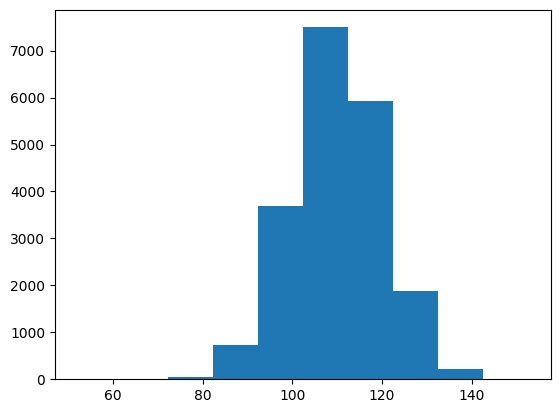

In [2]:
N = 20000 #20,000 students

#Generate from a normal distribution
data = np.random.randn(N)*10 + 110

plt.hist(data)

In [3]:
print("Population mean is:", np.mean(data))
print("Population variance is:", np.var(data))

Population mean is: 109.95800532353466
Population variance is: 99.3883586416645



### Now lets draw samples. Let's start with a sample size of 10 students

In [4]:
#One sample with 10 numbers

sample_10 = np.random.choice(data, 10)

sample_10

array([ 94.38448762, 108.82949336, 107.55056954,  93.66283585,
       109.94241727,  98.73240072, 122.07594034, 109.3934997 ,
        91.16509695, 110.48291147])

In [5]:
print("The sample mean is: ", np.mean(sample_10))

The sample mean is:  104.62196528262129


### How about if we repeat the sampling process, say 1,000 times

In [6]:
#Create an empty list to hold the numbers from each sample
sample_10_mean_list = []

for i in range(1000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    print(i," sample mean: ", sample_mean)
    
    #append them to the list
    sample_10_mean_list.append(sample_mean)

0  sample mean:  106.74290519995677
1  sample mean:  106.08575445833321
2  sample mean:  109.0660086667323
3  sample mean:  111.35613569139369
4  sample mean:  111.40980133663152
5  sample mean:  104.49956332451754
6  sample mean:  108.016557309795
7  sample mean:  108.96791941678154
8  sample mean:  110.83196043747134
9  sample mean:  107.95162655807655
10  sample mean:  108.18174209598286
11  sample mean:  107.840970249099
12  sample mean:  104.0162498164943
13  sample mean:  109.87935092392327
14  sample mean:  112.5354835510936
15  sample mean:  108.35771266381087
16  sample mean:  113.43425162649137
17  sample mean:  104.58915080459374
18  sample mean:  107.020236281516
19  sample mean:  108.12083934527621
20  sample mean:  109.1180180226211
21  sample mean:  115.31591051231642
22  sample mean:  111.3710639388909
23  sample mean:  109.86891271590414
24  sample mean:  111.50405649523402
25  sample mean:  112.00546907998651
26  sample mean:  112.15472080686611
27  sample mean:  114.

We observe a different sample mean every time we take sample. If we look at their distributions, the sampling distribution of the sample mean is:

(array([  7.,  32.,  59., 135., 230., 229., 172.,  78.,  47.,  11.]),
 array([100.39905002, 102.22660685, 104.05416367, 105.88172049,
        107.70927731, 109.53683413, 111.36439095, 113.19194777,
        115.01950459, 116.84706142, 118.67461824]),
 <BarContainer object of 10 artists>)

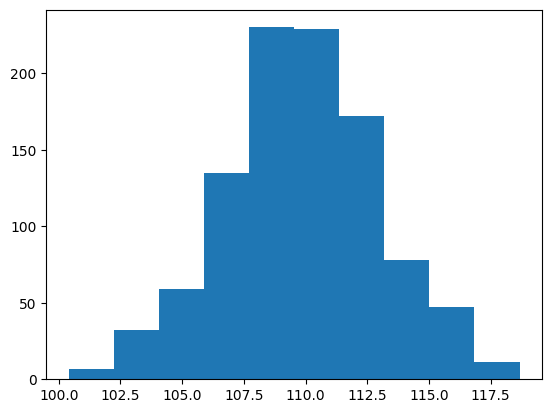

In [7]:
plt.hist(sample_10_mean_list)

**Important note:** This is not the distribution of IQ level! This is the distribution of average IQ level in a given sample (10 students in a sample) over 1,000 times.

The mean of this distribution is:

In [8]:
np.mean(sample_10_mean_list)

109.82986904803218

Let's compare with the population mean which is:

In [9]:
np.mean(data)

109.95800532353466

Fairly close!

Will it be closer for the sample mean to approach to the true mean if we 1) increase the sample size (10->100); and 2) do more samplings (10,000 -> 1,000,000). YES!

In [10]:
#Create an empty list to hold the numbers from each sample
sample_100_mean_list = []

for i in range(1000000):
    #generate a sample with 100 numbers
    sample = np.random.choice(data, 100)
    
    #compute sample mean
    sample_mean = np.mean(sample)
    
    #print(i," sample mean: ", sample_mean)
    
    #append them to the list
    sample_100_mean_list.append(sample_mean)

(array([9.20000e+01, 2.36300e+03, 2.78690e+04, 1.42704e+05, 3.22531e+05,
        3.26498e+05, 1.46257e+05, 2.90750e+04, 2.52000e+03, 9.10000e+01]),
 array([105.29868844, 106.22876807, 107.15884771, 108.08892734,
        109.01900697, 109.94908661, 110.87916624, 111.80924588,
        112.73932551, 113.66940514, 114.59948478]),
 <BarContainer object of 10 artists>)

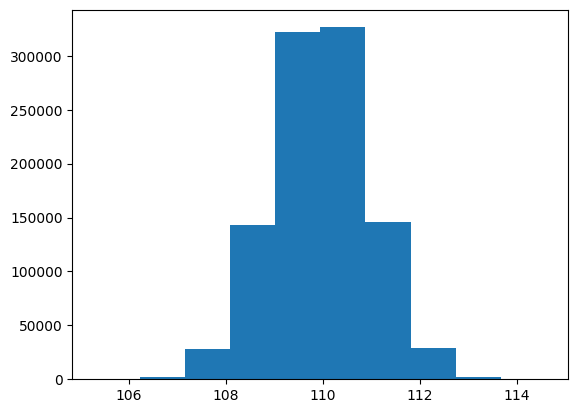

In [11]:
plt.hist(sample_100_mean_list)

In [12]:
print("Average sample mean:", np.mean(sample_100_mean_list))
print("True mean:", np.mean(data))

Average sample mean: 109.95948423680927
True mean: 109.95800532353466


Further increase sample size and sample times will make sample mean to converge to the true population mean, which shows that the sample mean is an **unbiased** statistics.

We can compare the distribution of the sample mean when using two different sample size.

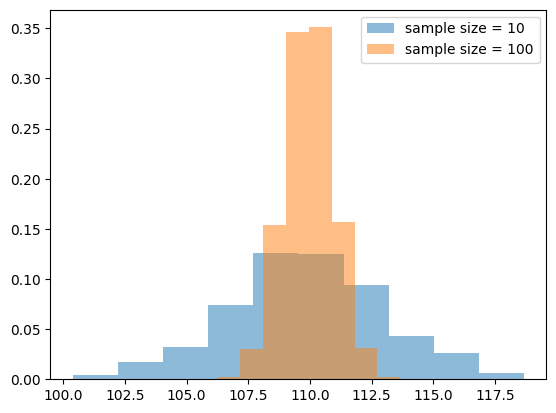

In [13]:
plt.hist(sample_10_mean_list, density=True, alpha=0.5,bins=10,label='sample size = 10')

plt.hist(sample_100_mean_list, density=True, alpha=0.5,bins=10,label='sample size = 100')

plt.legend()

Sampling distribution is wider (i.e., sampling variability is larger) when sample size is smaller!

This is because: analytically, the sampling distribution of the sample mean follows a normal distribution with mean as the population mean and the standard deviation as:$$\frac{\sigma}{\sqrt{n}}$$

where $\sigma$ is the population standard deviation, and $n$ is the sample size.

In [14]:
print("Analytical SD of the sampling distribution:", 
      np.std(data)/np.sqrt(10))

print("Empirical SD of the sampling distribution:", 
      np.std(sample_10_mean_list))

Analytical SD of the sampling distribution: 3.152591927948565
Empirical SD of the sampling distribution: 3.104999503724776


In [15]:
print("Analytical SD of the sampling distribution:", 
      np.std(data)/np.sqrt(100))

print("Empirical SD of the sampling distribution:", 
      np.std(sample_100_mean_list))

Analytical SD of the sampling distribution: 0.9969371025378908
Empirical SD of the sampling distribution: 0.996614939677267


### Similarly, let's examine the sampling distribution of sample variance.

In [16]:
#define a small function to calculate sample variance.
def sample_var(sample):
    mean = np.mean(sample)
    n = sample.shape[0]
    return np.sum((sample - mean)**2)/(n-1)

In [17]:
#One sample with 10 numbers

sample_10 = np.random.choice(data, 10)

sample_10

array([ 91.04490718, 108.72052627,  93.56019703, 104.32925697,
       101.8911226 , 100.56829739, 104.84237219, 126.10637067,
       116.00758508,  97.81321675])

In [18]:
print("Sample variance is:", sample_var(sample_10))

Sample variance is: 109.43489348534858


In [19]:
#generate samples for multiple times
sample_10_variance_list = []

for i in range(10000):
    #generate a sample with 10 numbers
    sample = np.random.choice(data, 10)
    
    #compute sample variance
    sample_variance = sample_var(sample)
    
    print(i," sample variance: ", sample_variance)
    
    #append them to the list
    sample_10_variance_list.append(sample_variance)

0  sample variance:  88.53453077285126
1  sample variance:  106.43178554410233
2  sample variance:  113.35462793746288
3  sample variance:  206.73215576304182
4  sample variance:  113.1263118871887
5  sample variance:  32.1268864895148
6  sample variance:  102.97519723410181
7  sample variance:  121.80263422941647
8  sample variance:  103.78771832867271
9  sample variance:  187.419579262907
10  sample variance:  145.84902730322472
11  sample variance:  102.73303754464251
12  sample variance:  94.37367568502185
13  sample variance:  83.08178746354518
14  sample variance:  85.38811014324173
15  sample variance:  124.85395741674867
16  sample variance:  21.201572925658393
17  sample variance:  87.85517073587049
18  sample variance:  67.2791230012536
19  sample variance:  144.12944170168478
20  sample variance:  76.25952353172099
21  sample variance:  43.57544306142986
22  sample variance:  137.81168260753682
23  sample variance:  95.12112427171449
24  sample variance:  82.92231187596784
2

Sampling distribution of the variance

(array([2.670e+03, 4.821e+03, 1.990e+03, 4.280e+02, 7.400e+01, 1.200e+01,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  6.8299263 ,  66.23990539, 125.64988447, 185.05986356,
        244.46984264, 303.87982173, 363.28980081, 422.6997799 ,
        482.10975898, 541.51973807, 600.92971715]),
 <BarContainer object of 10 artists>)

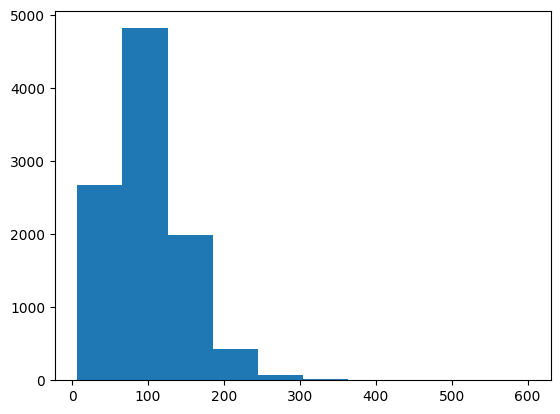

In [20]:
plt.hist(sample_10_variance_list)

In [21]:
print("Average of sample variance:", np.mean(sample_10_variance_list))

print("True variance:", np.var(data))

Average of sample variance: 98.98648330277135
True variance: 99.3883586416645


Again, fairly close!

Increase both sample size and the number of samples:

In [22]:
#generate samples for multiple times
sample_100_variance_list = []

for i in range(1000000):
    #generate a sample with 100 numbers
    sample = np.random.choice(data, 100)
    
    #compute sample variance
    sample_variance = sample_var(sample)
    
    #append them to the list
    sample_100_variance_list.append(sample_variance)

In [23]:
print("Average of sample variance:", np.mean(sample_100_variance_list))
print("True variance:", np.var(data))

Average of sample variance: 99.38875795088471
True variance: 99.3883586416645


Closer!

Compare the sampling distribution of sample mean for two same sizes.

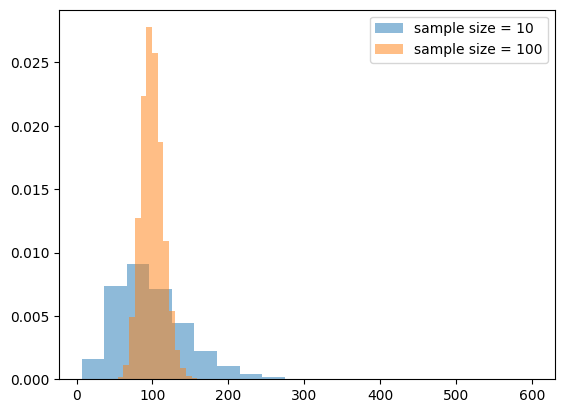

In [24]:
plt.hist(sample_10_variance_list,density=True,alpha=0.5,bins=20,label='sample size = 10')
plt.hist(sample_100_variance_list,density=True,alpha=0.5,bins=20,label='sample size = 100')
plt.legend()

Analytically, the sampling distribution of sample variance follows a chi-square distribution with n - 1 (n is the sample size) degree of freedom.

$$(n-1)s^2/\sigma^2 \sim \chi^2_{n-1}$$

where $s$ is the sample standard deviation and the $\sigma$ is the population standard deviation

numpy function to simulate a chisquare distribution: `random.chisquare(df, size=None)`

In [25]:
anlytical_dist_10 = np.random.chisquare(10-1, 10000)*np.var(data)/(10-1)

anlytical_dist_100 = np.random.chisquare(100-1, 10000)*np.var(data)/(100-1)

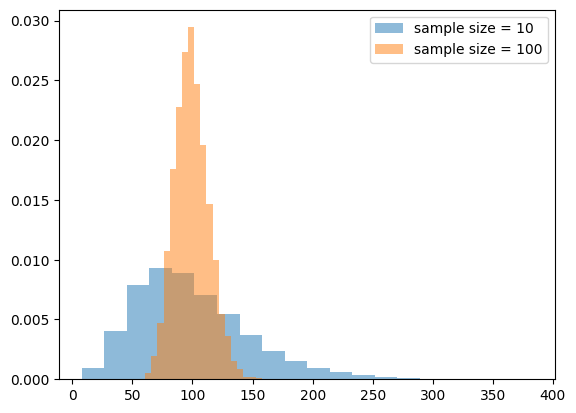

In [26]:
plt.hist(anlytical_dist_10,density=True,alpha=0.5,bins=20,label='sample size = 10')
plt.hist(anlytical_dist_100,density=True,alpha=0.5,bins=20,label='sample size = 100')
plt.legend()

The anlaytical distributions are the same as our emprical sampling distirbutions!